In [11]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("C:\\Users\\jengu\\anaconda3\\Lib\\site-packages\\pandas\\io\\excel\\Dataset_Agrupamiento.csv")

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# Información del dataset
print("\nInformación del dataset:")
print(df.info())

# Estadísticas descriptivas del dataset
print("\nEstadísticas descriptivas del dataset:")
print(df.describe())

# Valores faltantes
print("\nValores faltantes en el dataset:")
print(df.isnull().sum())

# Preprocesamiento de datos: eliminar filas con valores faltantes
df_clean = df.dropna()

# Mostrar la cantidad de filas eliminadas
print("\nCantidad de filas eliminadas con valores faltantes:", df.shape[0] - df_clean.shape[0])

# Guardar el dataset limpio
df_clean.to_csv("Dataset_Agrupamiento_Limpio.csv", index=False)


Primeras filas del dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
No

In [1]:
echo "# codigos" >> README.md


In [3]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Cargar el dataset limpio
df_clean = pd.read_csv("Dataset_Agrupamiento_Limpio.csv")

# Separar características (X) y etiquetas (y)
X = df_clean.drop(columns=['CustomerID', 'Gender'])
y = df_clean['Gender']

# Seleccionar todas las características
selector = SelectKBest(score_func=f_classif, k=min(4, len(X.columns)))
X_selected = selector.fit_transform(X, y)

# Obtener los índices de las características seleccionadas
mask = selector.get_support() 

# Obtener los nombres de las características seleccionadas
features_selected = X.columns[mask]
print("Características seleccionadas:")
print(features_selected)


Características seleccionadas:
Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [4]:
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Establecer la variable de entorno para evitar la advertencia de KMeans
os.environ["OMP_NUM_THREADS"] = "1"

# Cargar el dataset limpio
df_clean = pd.read_csv("Dataset_Agrupamiento_Limpio.csv")

# Separar características (X)
X = df_clean[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Entrenar el modelo de K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Etiquetas de los clusters
labels = kmeans.labels_

# Calcular el Coeficiente de Silhouette
silhouette = silhouette_score(X, labels)
print("\nCoeficiente de Silhouette:", silhouette)

# Calcular el Índice de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(X, labels)
print("Índice de Calinski-Harabasz:", calinski_harabasz)


Coeficiente de Silhouette: 0.40546302077733304
Índice de Calinski-Harabasz: 127.9838294818919


C:\Users\jengu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Cargar el dataset limpio
df_clean = pd.read_csv("Dataset_Agrupamiento_Limpio.csv")

# Separar características (X)
X = df_clean[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Seleccionar las características más relevantes
selector = SelectKBest(score_func=f_classif, k=4)
X_selected = selector.fit_transform(X, df_clean['Gender'])

# Entrenar el modelo de K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_selected)

# Etiquetas de los clusters
labels_kmeans = kmeans.labels_

# Calcular el Coeficiente de Silhouette para KMeans
silhouette_kmeans = silhouette_score(X_selected, labels_kmeans)
print("\nCoeficiente de Silhouette para KMeans:", silhouette_kmeans)

# Calcular el Índice de Calinski-Harabasz para KMeans
calinski_harabasz_kmeans = calinski_harabasz_score(X_selected, labels_kmeans)
print("Índice de Calinski-Harabasz para KMeans:", calinski_harabasz_kmeans)

# Entrenar el modelo de hierarchical clustering
hc = AgglomerativeClustering(n_clusters=4)
hc.fit(X_selected)

# Etiquetas de los clusters
labels_hc = hc.labels_

# Calcular el Coeficiente de Silhouette para hierarchical clustering
silhouette_hc = silhouette_score(X_selected, labels_hc)
print("\nCoeficiente de Silhouette para hierarchical clustering:", silhouette_hc)

# Calcular el Índice de Calinski-Harabasz para hierarchical clustering
calinski_harabasz_hc = calinski_harabasz_score(X_selected, labels_hc)
print("Índice de Calinski-Harabasz para hierarchical clustering:", calinski_harabasz_hc)



Coeficiente de Silhouette para KMeans: 0.40546302077733304
Índice de Calinski-Harabasz para KMeans: 127.9838294818919

Coeficiente de Silhouette para hierarchical clustering: 0.41037986351850747
Índice de Calinski-Harabasz para hierarchical clustering: 124.30185054821396


C:\Users\jengu\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=4 is greater than n_features=3. All the features will be returned.
  warnings.warn(
C:\Users\jengu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


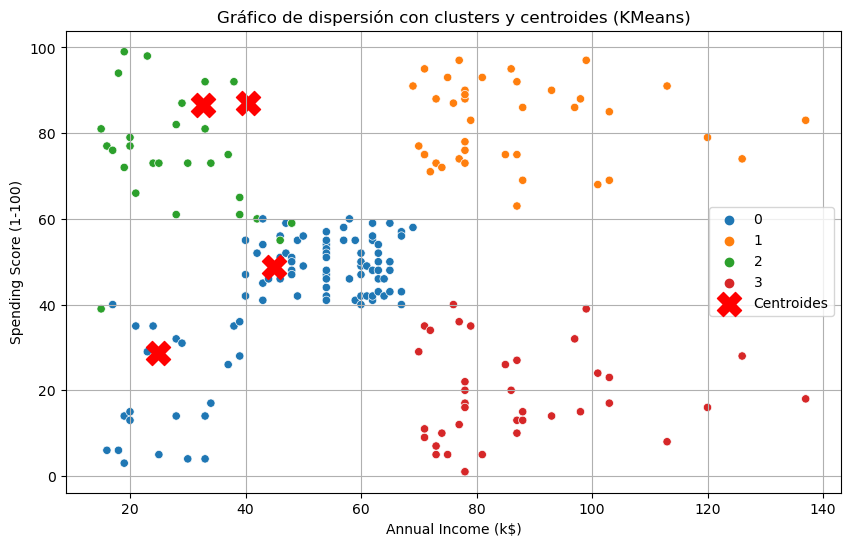

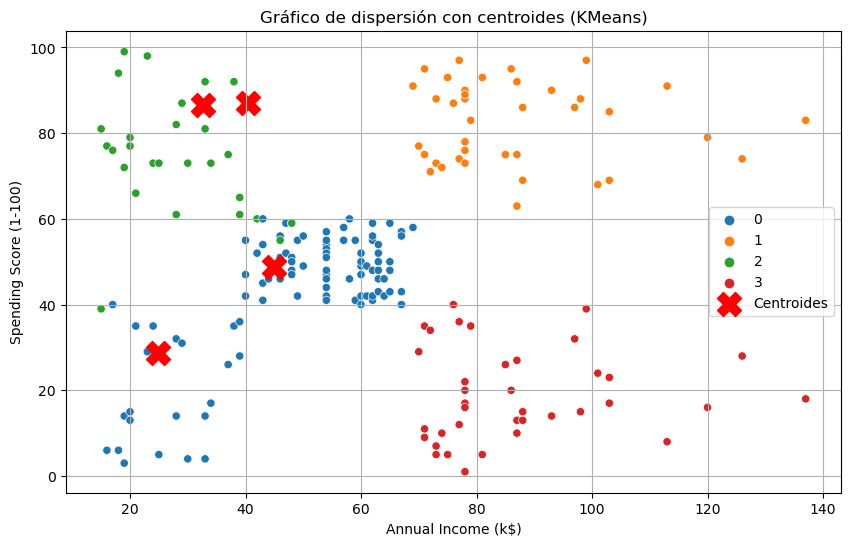

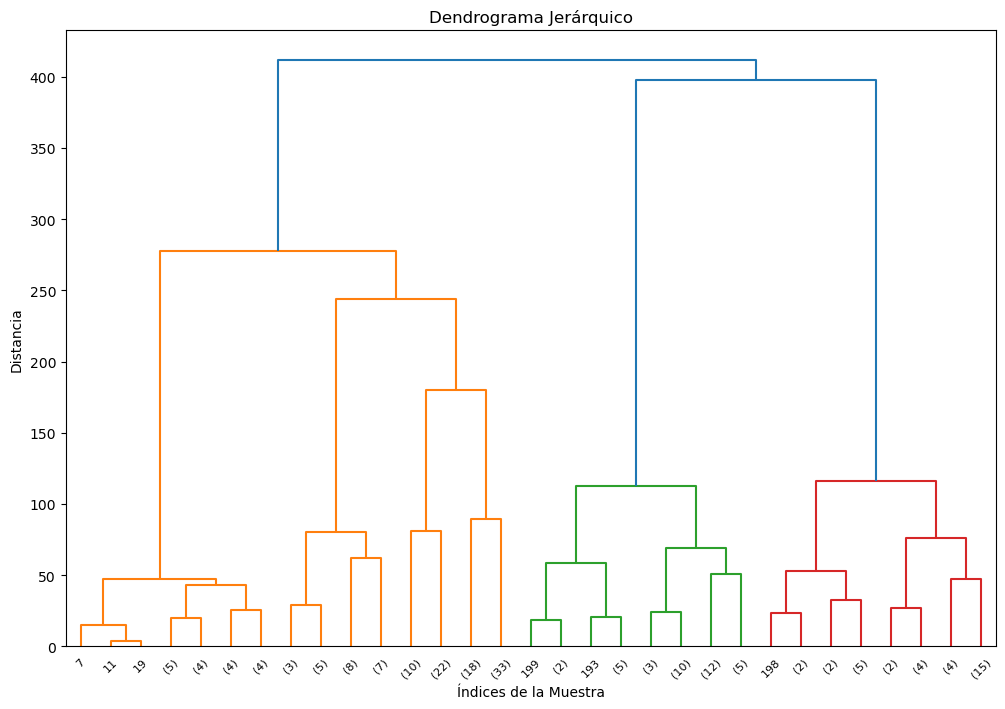

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
# Gráfico de dispersión con colores de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Annual Income (k$)', y='Spending Score (1-100)', hue=labels_kmeans, palette='tab10', legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroides')
plt.title('Gráfico de dispersión con clusters y centroides (KMeans)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico que muestra los centroides de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Annual Income (k$)', y='Spending Score (1-100)', hue=labels_kmeans, palette='tab10', legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroides')
plt.title('Gráfico de dispersión con centroides (KMeans)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

# Cargar el dataset limpio
df_clean = pd.read_csv("Dataset_Agrupamiento_Limpio.csv")

# Separar características (X)
X = df_clean[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Entrenar el modelo de hierarchical clustering
hc = AgglomerativeClustering(n_clusters=4)
hc.fit(X)

# Generar el dendrograma
plt.figure(figsize=(12, 8))
dn = hierarchy.dendrogram(hierarchy.linkage(X, method='ward'), truncate_mode='level', p=4)
plt.title('Dendrograma Jerárquico')
plt.xlabel('Índices de la Muestra')
plt.ylabel('Distancia')
plt.show()